In [ ]:
# Импорт основного датасета 

import pandas as pd

file_path = 'reviews_output_with_id.csv'

data = pd.read_csv(file_path, encoding='UTF-8', delimiter=',')

data = data.dropna(subset=["ID", "Review Title", "Rating", "Review Text", "Date"])

data = data.drop_duplicates(subset=["ID"])

print(data.shape)

(2709, 5)


In [ ]:
# очистка текста (приведение текста к нижнему регистру удаление символов не на кириллице)

import pandas as pd
import re
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')
russian_stopwords = stopwords.words('russian')

custom_stopwords = ["банк", "дом", "рф", "ао"]

all_stopwords = set(russian_stopwords + custom_stopwords)

def clear_text(text: str) -> str:
    clean_text = re.sub(r'[^А-Яа-яЁё]+', ' ', text).lower()
    return ' '.join(clean_text.split())

def clean_stop_words(text: str, all_stopwords: list) -> str:
    text = [word for word in text.split() if word not in all_stopwords]
    return ' '.join(text)

def preprocess_text(text: str, all_stopwords: list = all_stopwords) -> str:
    text = clear_text(text)
    text = clean_stop_words(text, all_stopwords)
    return text

data['Processed Text'] = data['Review Text'].apply(preprocess_text)

print(data)

        ID                     Review Title  Rating  \
0        1                     Хороший банк       5   
1        2                Сделка по ипотеке       5   
2        3                   Онлайн ипотека       5   
3        4                    Отличный банк       5   
4        5                   Оплата ипотеки       5   
...    ...                              ...     ...   
2704  2705     Очень медленное обслуживание       2   
2705  2706              Качественная работа       4   
2706  2707  Надо менять кадры или структуру       1   
2707  2708           Платеж в Дельта-Кредит       1   
2708  2709       Непростительная халатность       1   

                                            Review Text              Date  \
0     Являюсь клиентом с 2023 года. Ранее взяли ипот...  04.12.2024 10:53   
1     Планировали купить жилой дом по программе семе...  04.12.2024 09:04   
2     Давно мечтала обеспечить дочку квартирой в Мос...  27.11.2024 20:56   
3     27 ноября 2024 года приех

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/semenzidkov/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# лемматизация текста 

import pandas as pd
import re
from nltk.corpus import stopwords
import nltk
from pymystem3 import Mystem

# Инициализация Mystem
mystem = Mystem()

# Загрузка стоп-слов для русского языка
nltk.download('stopwords')
russian_stopwords = stopwords.words('russian')

custom_stopwords = ["банк", "дом", "рф", "ао"]

all_stopwords = set(russian_stopwords + custom_stopwords)

# Функция для очистки текста
def clear_text(text: str) -> str:
    """
    Очищает текст, оставляя только кириллические символы и приводя слова к нижнему регистру.
    """
    clean_text = re.sub(r'[^А-Яа-яЁё]+', ' ', text).lower()
    return ' '.join(clean_text.split())

# Функция для удаления стоп-слов
def clean_stop_words(text: str, all_stopwords: list) -> str:
    """
    Удаляет стоп-слова из текста.
    """
    text = [word for word in text.split() if word not in all_stopwords]
    return ' '.join(text)

# Функция для лемматизации текста с помощью pymystem3
def lemmatize_text(text: str) -> str:
    """
    Лемматизация текста с использованием pymystem3.
    """
    lemmatized_text = ''.join(mystem.lemmatize(text))
    return lemmatized_text.strip()

# Полная обработка текста
def preprocess_text(text: str, all_stopwords: list = all_stopwords) -> str:
    """
    Полная обработка текста: очистка, удаление стоп-слов, лемматизация.
    """
    text = clear_text(text)  # Очистка текста
    text = clean_stop_words(text, all_stopwords)  # Удаление стоп-слов
    text = lemmatize_text(text)  # Лемматизация
    return text

# Пример DataFrame

# Применение полной обработки текста к столбцу 'Review Text'
data['Processed Text'] = data['Review Text'].apply(preprocess_text)

# Результат
print(data)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/semenzidkov/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


        ID                     Review Title  Rating  \
0        1                     Хороший банк       5   
1        2                Сделка по ипотеке       5   
2        3                   Онлайн ипотека       5   
3        4                    Отличный банк       5   
4        5                   Оплата ипотеки       5   
...    ...                              ...     ...   
2704  2705     Очень медленное обслуживание       2   
2705  2706              Качественная работа       4   
2706  2707  Надо менять кадры или структуру       1   
2707  2708           Платеж в Дельта-Кредит       1   
2708  2709       Непростительная халатность       1   

                                            Review Text              Date  \
0     Являюсь клиентом с 2023 года. Ранее взяли ипот...  04.12.2024 10:53   
1     Планировали купить жилой дом по программе семе...  04.12.2024 09:04   
2     Давно мечтала обеспечить дочку квартирой в Мос...  27.11.2024 20:56   
3     27 ноября 2024 года приех

In [ ]:
# 2-3 ngrams 

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Функция для определения наиболее частотных слов
def get_top_words(texts, top_n=10):
    """
    Определяет наиболее частотные слова в текстах.
    
    :param texts: Список текстов.
    :param top_n: Количество наиболее частотных слов.
    :return: DataFrame с частотными словами.
    """
    # Инициализация CountVectorizer
    vectorizer = CountVectorizer(ngram_range=(2,3))
    word_counts = vectorizer.fit_transform(texts)

    # Получение суммарного количества слов
    total_counts = word_counts.sum(axis=0).A1
    words = vectorizer.get_feature_names_out()

    # Создание DataFrame с частотами
    word_freq = pd.DataFrame({'Word': words, 'Frequency': total_counts})
    word_freq = word_freq.sort_values(by='Frequency', ascending=False).head(top_n)
    return word_freq

# Получение наиболее частотных слов
top_words = get_top_words(data['Processed Text'], top_n=10)

# Вывод результатов
print("Наиболее частотные слова:")
print(top_words)

Наиболее частотные слова:
                           Word  Frequency
15293               добрый день        371
27147          ипотечный кредит        264
33460            личный кабинет        189
65939  рефинансирование ипотека        172
24802              ипотека банк        171
53762           подавать заявка        166
49575         оформлять ипотека        161
73216            сотрудник банк        152
11501             горячий линия        146
17865       досрочный погашение        119


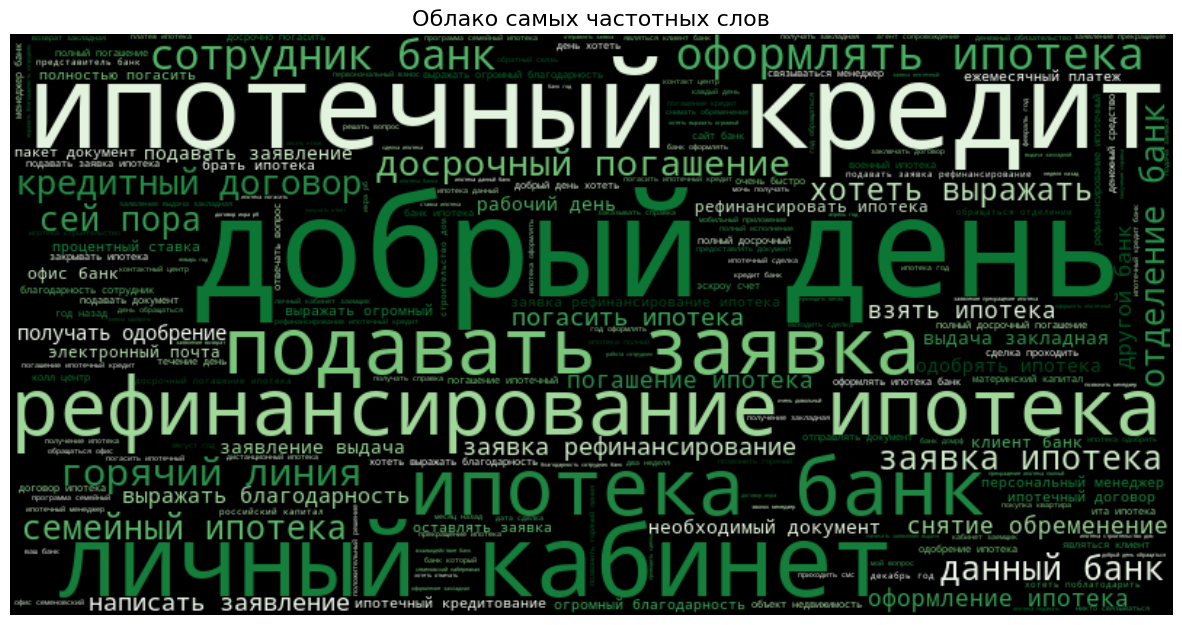

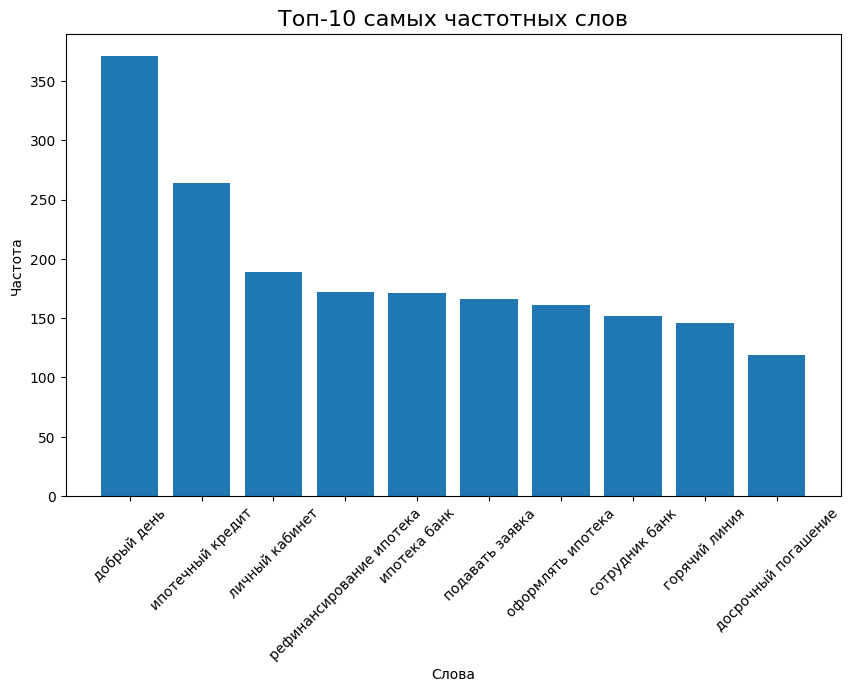

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Пример DataFrame

# Функция для определения частотных слов
def get_word_frequencies(texts):
    vectorizer = CountVectorizer(ngram_range=(2,3))
    word_counts = vectorizer.fit_transform(texts)
    words = vectorizer.get_feature_names_out()
    frequencies = word_counts.sum(axis=0).A1
    return dict(zip(words, frequencies))

# Получение частотных слов
word_frequencies = get_word_frequencies(data['Processed Text'])

# Построение облака слов
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Greens')
wordcloud.generate_from_frequencies(word_frequencies)

# Отображение облака слов
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Убираем оси
plt.title("Облако самых частотных слов", fontsize=16)
plt.show()

# Построение гистограммы самых частотных слов
top_words = pd.DataFrame(word_frequencies.items(), columns=["Word", "Frequency"]).sort_values(by="Frequency", ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_words["Word"], top_words["Frequency"])
plt.title("Топ-10 самых частотных слов", fontsize=16)
plt.xlabel("Слова")
plt.ylabel("Частота")
plt.xticks(rotation=45)
plt.show()


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation


# Преобразование текстов в Bag-of-Words (матрица частот)
vectorizer = CountVectorizer(ngram_range=(2,3))
text_bow = vectorizer.fit_transform(data['Processed Text'])

# Определение количества тем
n_topics = 10

# Обучение модели LDA
lda_model = LatentDirichletAllocation(
    n_components=n_topics,
    topic_word_prior=0.01,
    random_state=42,
    max_iter=200,
    learning_method='batch')
lda_model.fit(text_bow)

# Функция для отображения ключевых слов в темах
def print_topics(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Тема {topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

# Печать ключевых слов для каждой темы
n_top_words = 5
print("Ключевые слова в темах:")
print_topics(lda_model, vectorizer.get_feature_names_out(), n_top_words)

# Получение распределения тем для каждого документа
doc_topic_distributions = lda_model.transform(text_bow)
data['Dominant Topic'] = doc_topic_distributions.argmax(axis=1) + 1  # Номер темы (1, 2, ...)
print("\nДокументы с их доминирующими темами:")
print(data[['ID', 'Processed Text', 'Dominant Topic']])
